<a href="https://colab.research.google.com/github/nafi-rahman/100-days-of-python/blob/main/custom_train_pix2pix_B%26W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#model load and dataset

In [ ]:
# Install necessary dependencies and clone the repository
!pip install git+https://github.com/huggingface/datasets
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
!pip install -r pytorch-CycleGAN-and-pix2pix/requirements.txt

  Cloning https://github.com/huggingface/datasets to /tmp/pip-req-build-1tp04zsx
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/datasets /tmp/pip-req-build-1tp04zsx
  Resolved https://github.com/huggingface/datasets to commit 2049c00921c59cdeb835137a1c49639cf175af07
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
  Created wheel for datasets: filename=datasets-3.1.1.dev0-py3-none-any.whl size=480712 sha256=00e7f002bf8f23f6cf42c8ecb401e4ac9fa87c9aca7d2f9348215f584b080685
  Stored in directory: /tmp/pip-ephem-wheel-cache-b8mouw2o/wheels/7f/ba/ce/8f

In [ ]:
# Navigate to the project directory
%cd pytorch-CycleGAN-and-pix2pix

/content/pytorch-CycleGAN-and-pix2pix


loading and prepping the dataset

In [ ]:
from datasets import load_dataset
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load dataset
dataset = load_dataset("csr/Image-Colorization", split="train")

# Split dataset into train and test sets
split_dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset["train"]
test_dataset = split_dataset["test"]

# Set the base directory for saving the dataset
base_dir = "datasets/colorization"
os.makedirs(f"{base_dir}/A/train", exist_ok=True)  # Grayscale images (A)
os.makedirs(f"{base_dir}/B/train", exist_ok=True)  # Color images (B)
os.makedirs(f"{base_dir}/A/test", exist_ok=True)  # Grayscale images (A) for test
os.makedirs(f"{base_dir}/B/test", exist_ok=True)  # Color images (B) for test

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

dataset_1k.tar.gz:   0%|          | 0.00/495M [00:00<?, ?B/s]

dataset_2k.tar.gz:   0%|          | 0.00/256M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6000 [00:00<?, ? examples/s]

In [ ]:
# import numpy as np
# from tqdm import tqdm
# from PIL import Image, ImageOps
# import random

# # Function to add noise to an image
# def add_noise(image, noise_level=0.05):
#     """
#     Adds random noise to the image.

#     Args:
#         image: PIL.Image object to add noise to.
#         noise_level: Float, the intensity of the noise (default 0.05).

#     Returns:
#         PIL.Image object with added noise.
#     """
#     np_image = np.array(image).astype(np.float32) / 255.0
#     noise = np.random.normal(0, noise_level, np_image.shape)
#     noisy_image = np.clip(np_image + noise, 0, 1) * 255
#     return Image.fromarray(noisy_image.astype(np.uint8))

# # Function to augment an image
# def augment_image(image, flip_horizontal=False, flip_vertical=False):
#     """
#     Augments the image by applying random flips.

#     Args:
#         image: PIL.Image object to augment.
#         flip_horizontal: Bool, whether to flip horizontally.
#         flip_vertical: Bool, whether to flip vertically.

#     Returns:
#         Augmented PIL.Image object.
#     """
#     if flip_horizontal:
#         image = ImageOps.mirror(image)
#     if flip_vertical:
#         image = ImageOps.flip(image)

#     return image

# # Function to save grayscale and color images
# def save_images(dataset, mode):
#     for idx, example in tqdm(enumerate(dataset), desc=f"Processing {mode} dataset"):
#         combined_image = example['jpg']

#         # Split the image in half (left side grayscale, right side color)
#         width, height = combined_image.size
#         gray_image = combined_image.crop((0, 0, width // 2, height))  # Left half (grayscale)
#         color_image = combined_image.crop((width // 2, 0, width, height))  # Right half (color)

#         # Determine consistent augmentations
#         flip_horizontal = random.random() > 0.5
#         flip_vertical = random.random() > 0.5

#         # Apply augmentations consistently
#         gray_image = augment_image(gray_image, flip_horizontal, flip_vertical)
#         color_image = augment_image(color_image, flip_horizontal, flip_vertical)

#         # Add noise consistently to grayscale image
#         gray_image = add_noise(gray_image)

#         # Save the images to the corresponding directory
#         gray_image.save(f"{base_dir}/A/{mode}/{idx}.jpg")
#         color_image.save(f"{base_dir}/B/{mode}/{idx}.jpg")

# # Save train and test images
# save_images(train_dataset, mode="train")
# save_images(test_dataset, mode="test")

# print("Train and test datasets saved!")


In [ ]:
from tqdm import tqdm
from PIL import Image, ImageEnhance, ImageOps
import random
import numpy as np

# Augmentation functions
def augment_image(image, emphasize_blue=True):
    """
    Apply random augmentations: color jittering, hue shifts, saturation adjustments, and slight noise.
    Args:
        image (PIL.Image): Input image.
        emphasize_blue (bool): Whether to emphasize blue tones in the augmentation.
    Returns:
        PIL.Image: Augmented image.
    """
    # Random brightness adjustment
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Brightness factor

    # Random contrast adjustment
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Contrast factor

    # Random saturation adjustment
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Saturation factor

    # Random hue adjustment (with blue emphasis)
    if random.random() > 0.5:  # 50% chance of applying hue shift
        image = image.convert("HSV")
        hsv_array = np.array(image)
        if emphasize_blue:
            hsv_array[..., 0] = (hsv_array[..., 0] + random.randint(10, 30)) % 256  # Blue shift
        else:
            hsv_array[..., 0] = (hsv_array[..., 0] + random.randint(-10, 10)) % 256  # Random shift
        image = Image.fromarray(hsv_array, "HSV").convert("RGB")

    # Add slight random noise
    if random.random() > 0.5:
        image_array = np.array(image)
        noise = np.random.normal(0, 10, image_array.shape).astype(np.int32)
        image_array = np.clip(image_array + noise, 0, 255).astype(np.uint8)
        image = Image.fromarray(image_array)

    return image

# Function to save grayscale and color images with synchronized flipping and augmentation
def save_images_with_augmentation(dataset, mode):
    for idx, example in tqdm(enumerate(dataset), desc=f"Processing {mode} dataset"):
        combined_image = example['jpg']

        # Split the image in half (left side grayscale, right side color)
        width, height = combined_image.size
        gray_image = combined_image.crop((0, 0, width // 2, height))  # Left half (grayscale)
        color_image = combined_image.crop((width // 2, 0, width, height))  # Right half (color)

        # Apply synchronized random horizontal flip
        if random.random() > 0.5:
            gray_image = ImageOps.mirror(gray_image)
            color_image = ImageOps.mirror(color_image)

        # Apply synchronized random vertical flip
        if random.random() > 0.5:
            gray_image = ImageOps.flip(gray_image)
            color_image = ImageOps.flip(color_image)

        # Augment the color image
        color_image_augmented = augment_image(color_image, emphasize_blue=True)

        # Save the images to the corresponding directory
        gray_image.save(f"{base_dir}/A/{mode}/{idx}.jpg")
        color_image_augmented.save(f"{base_dir}/B/{mode}/{idx}.jpg")

# Save train and test images with augmentation
save_images_with_augmentation(train_dataset, mode="train")
save_images_with_augmentation(test_dataset, mode="test")

print("Train and test datasets with enhanced augmentation saved!")


Processing train dataset: 4800it [02:35, 30.80it/s]
Processing test dataset: 1200it [00:36, 33.14it/s]

Train and test datasets with enhanced augmentation saved!


In [ ]:
import numpy as np
from PIL import Image
import os
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt

# Paths to the color images directory
color_images_path = "datasets/colorization/B/train"

# Initialize accumulators for RGB histograms
rgb_histograms = {"red": np.zeros(256), "green": np.zeros(256), "blue": np.zeros(256)}

# Function to compute dominant colors
def get_dominant_colors(image, k=5):
    """
    Perform k-means clustering to find dominant colors in the image.
    Args:
        image (PIL.Image): The input image.
        k (int): Number of clusters (dominant colors).
    Returns:
        dominant_colors (list): List of RGB tuples for dominant colors.
    """
    image = image.resize((50, 50))  # Smaller size for memory efficiency
    image_array = np.array(image)
    pixels = image_array.reshape(-1, 3)  # Flatten the image array
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
    dominant_colors = kmeans.cluster_centers_.astype(int)  # RGB values
    return dominant_colors

# Analyze images in batches
dominant_colors_list = []
image_files = os.listdir(color_images_path)

for image_name in tqdm(image_files):
    image_path = os.path.join(color_images_path, image_name)
    try:
        image = Image.open(image_path).convert("RGB")

        # Update RGB histograms
        image_array = np.array(image.resize((50, 50)))  # Smaller image size
        rgb_histograms["red"] += np.histogram(image_array[:, :, 0], bins=256, range=(0, 256))[0]
        rgb_histograms["green"] += np.histogram(image_array[:, :, 1], bins=256, range=(0, 256))[0]
        rgb_histograms["blue"] += np.histogram(image_array[:, :, 2], bins=256, range=(0, 256))[0]

        # Get dominant colors
        dominant_colors = get_dominant_colors(image)
        dominant_colors_list.append(dominant_colors)

    except Exception as e:
        print(f"Error processing image {image_name}: {e}")

# Convert dominant colors to a NumPy array for easier processing
dominant_colors_array = np.vstack(dominant_colors_list)


100%|██████████| 4800/4800 [00:45<00:00, 104.84it/s]


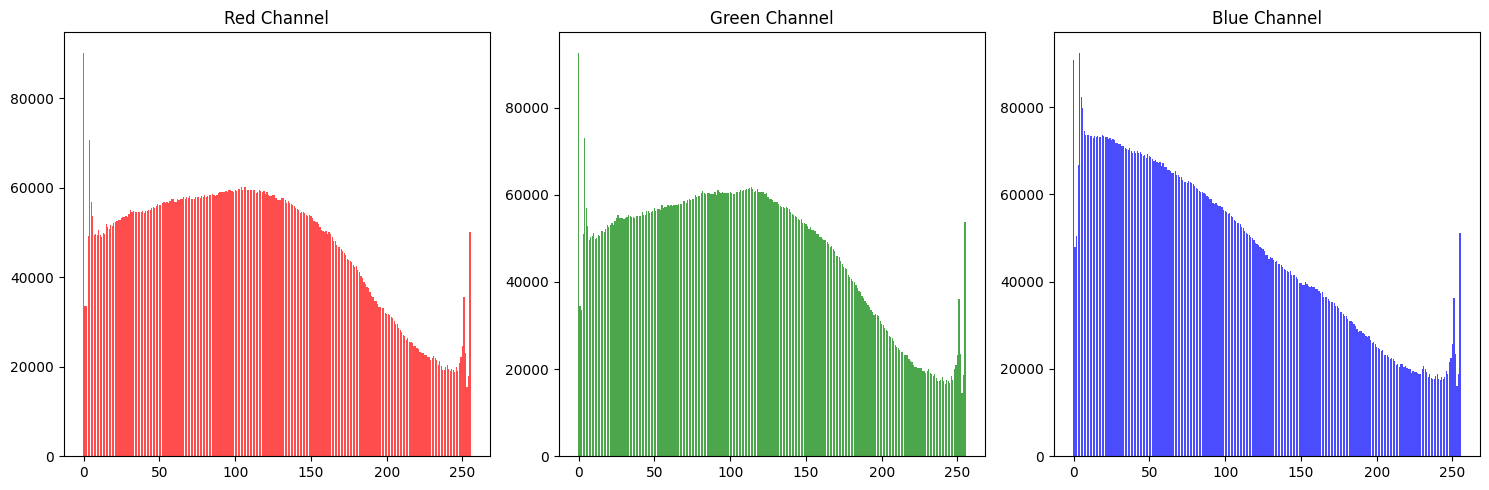

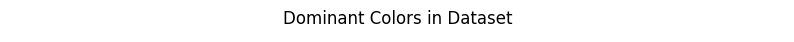

In [ ]:
# Plot RGB histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(range(256), rgb_histograms["red"], color="red", alpha=0.7)
plt.title("Red Channel")
plt.subplot(1, 3, 2)
plt.bar(range(256), rgb_histograms["green"], color="green", alpha=0.7)
plt.title("Green Channel")
plt.subplot(1, 3, 3)
plt.bar(range(256), rgb_histograms["blue"], color="blue", alpha=0.7)
plt.title("Blue Channel")
plt.tight_layout()
plt.show()

# Display dominant colors
plt.figure(figsize=(10, 2))
plt.imshow([dominant_colors_array / 255])  # Normalize to [0, 1] for display
plt.axis("off")
plt.title("Dominant Colors in Dataset")
plt.show()


In [ ]:
# Combine training images
!python datasets/combine_A_and_B.py --fold_A ./datasets/colorization/A --fold_B ./datasets/colorization/B --fold_AB ./datasets/colorization/


print("Dataset is ready for Pix2Pix training!")


[fold_A] =  ./datasets/colorization/A
[fold_B] =  ./datasets/colorization/B
[fold_AB] =  ./datasets/colorization/
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = test, use 1200/1200 images
split = test, number of images = 1200
split = train, use 4800/4800 images
split = train, number of images = 4800
Dataset is ready for Pix2Pix training!


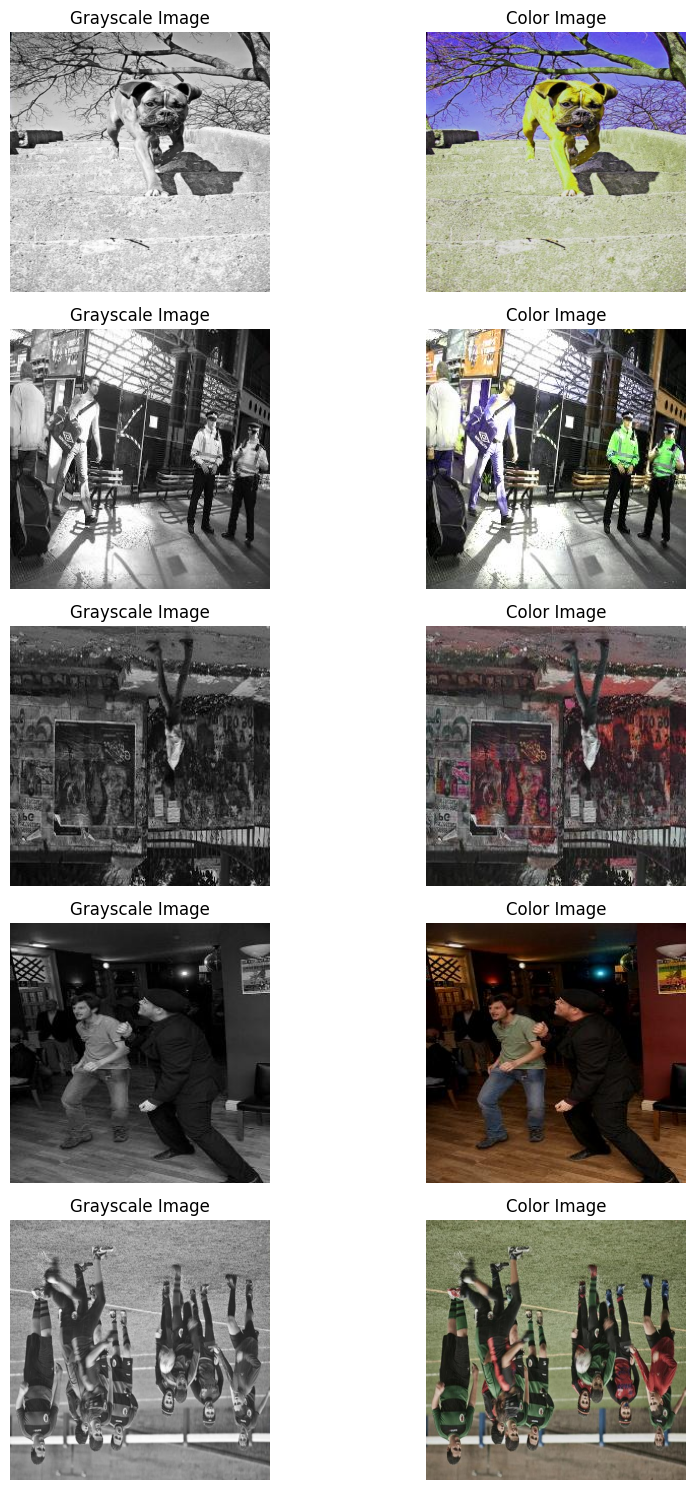

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to visualize grayscale and color images
def visualize_split_images():
    # Display 5 examples of grayscale and color images side by side
    fig, axs = plt.subplots(5, 2, figsize=(10, 15))

    for i in range(5):
        # Load grayscale and color images
        gray_img = Image.open(f"datasets/colorization/A/train/{i}.jpg")
        color_img = Image.open(f"datasets/colorization/B/train/{i}.jpg")

        # Display grayscale image
        axs[i, 0].imshow(gray_img, cmap="gray")
        axs[i, 0].axis("off")
        axs[i, 0].set_title("Grayscale Image")

        # Display color image
        axs[i, 1].imshow(color_img)
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Color Image")

    plt.tight_layout()
    plt.show()

# Visualize the split images
visualize_split_images()


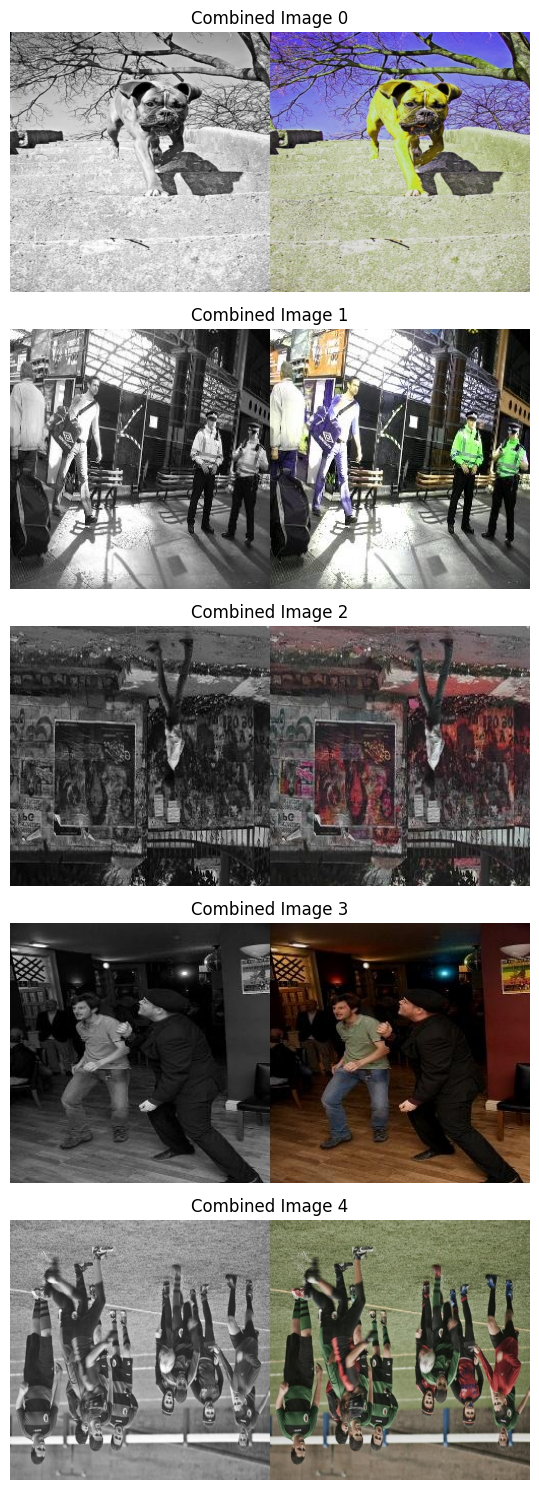

In [ ]:
# Function to visualize combined images
def visualize_combined_images():
    # Display 5 combined images from the train dataset
    fig, axs = plt.subplots(5, 1, figsize=(10, 15))

    for i in range(5):
        # Load combined image (both grayscale and color in a single image)
        combined_img = Image.open(f"datasets/colorization/train/{i}.jpg")

        # Display combined image
        axs[i].imshow(combined_img)
        axs[i].axis("off")
        axs[i].set_title(f"Combined Image {i}")

    plt.tight_layout()
    plt.show()

# Visualize the combined images
visualize_combined_images()


#Training

In [ ]:
# Start training Pix2Pix model with updated arguments for better learning
!python train.py --dataroot ./datasets/colorization --name colorization_pix2pix --model pix2pix --direction AtoB --batch_size 16 --n_epochs 5 --n_epochs_decay 5 --lr 0.00015 --lr_policy plateau --lambda_L1 60  --beta1 0.5 --ndf 128  --netD n_layers --n_layers_D 4 --dataset_mode aligned --gan_mode lsgan --save_epoch_freq 5 --load_size 286  --crop_size 256 --norm batch --pool_size 0
# View training logs to monitor progress

!cat checkpoints/colorization_pix2pix/loss_log.txt | tail -n 10

----------------- Options ---------------
               batch_size: 16                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/colorization       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

#continue training

In [ ]:
os.makedirs("./checkpoints/colorization_pix2pix/", exist_ok=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/colorization_pix2pix_model/latest_net_G.pth ./checkpoints/colorization_pix2pix/
!cp /content/drive/MyDrive/colorization_pix2pix_model/latest_net_D.pth ./checkpoints/colorization_pix2pix/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Start training Pix2Pix model with updated arguments for better learning
!python train.py --dataroot ./datasets/colorization --name colorization_pix2pix --model pix2pix --direction AtoB --batch_size 32 --n_epochs 20 --n_epochs_decay 10 --continue_train --lr 0.0001 --lr_policy plateau --lambda_L1 70  --beta1 0.6 --ndf 128  --netD n_layers --n_layers_D 4 --dataset_mode aligned --gan_mode lsgan --save_epoch_freq 5 --load_size 286  --crop_size 256 --norm batch --pool_size 0
# View training logs to monitor progress

!cat checkpoints/colorization_pix2pix/loss_log.txt | tail -n 10

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: ./datasets/colorization       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest         

#refine continue training

In [ ]:
# Start training Pix2Pix model with updated arguments for better learning
!python train.py --dataroot ./datasets/colorization --name colorization_pix2pix --model pix2pix --direction AtoB --batch_size 32 --n_epochs 5 --n_epochs_decay 5 --continue_train --lr 0.0001 --lambda_L1 100 --gan_mode lsgan --lr_policy step  --beta1 0.6 --save_epoch_freq 2 --display_freq 400 --load_size 286  --crop_size 256
# Optional: View training logs to monitor progress
!cat checkpoints/colorization_pix2pix/loss_log.txt | tail -n 10

----------------- Options ---------------
               batch_size: 32                            	[default: 1]
                    beta1: 0.6                           	[default: 0.5]
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: ./datasets/colorization       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: 

#testing

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/colorization       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

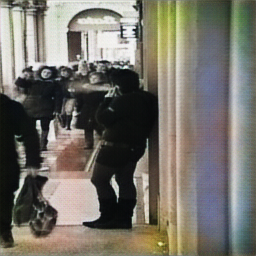

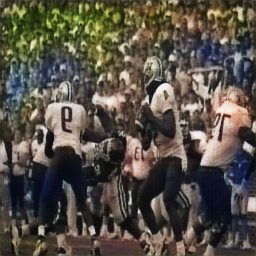

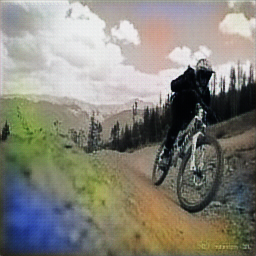

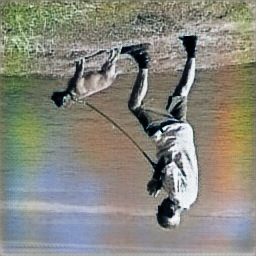

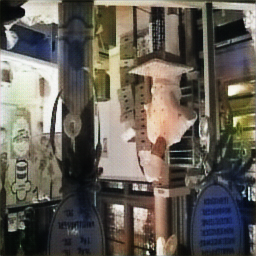

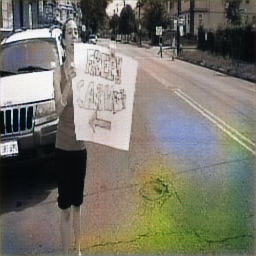

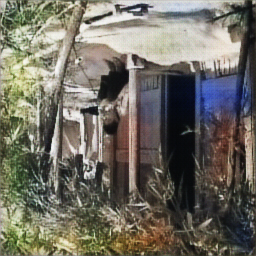

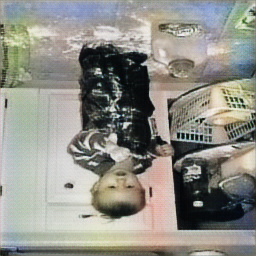

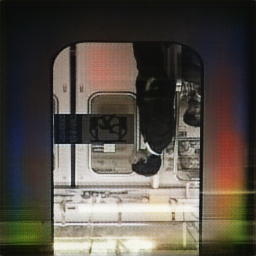

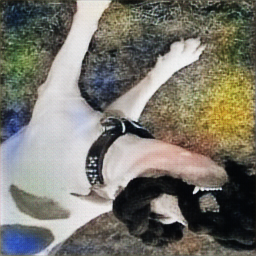

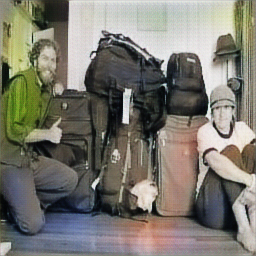

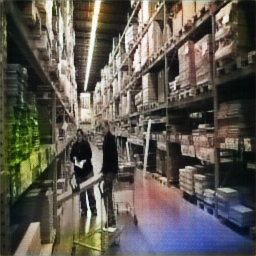

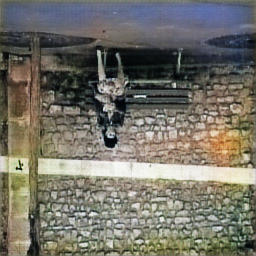

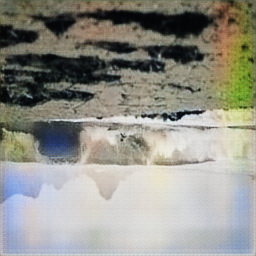

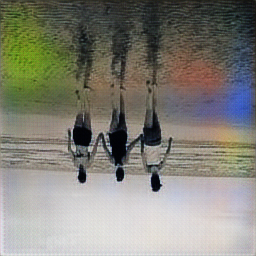

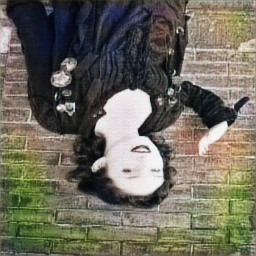

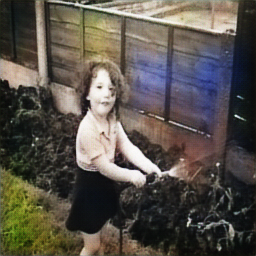

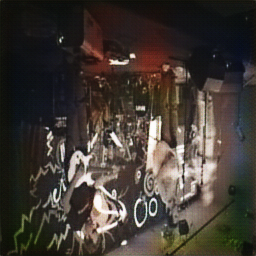

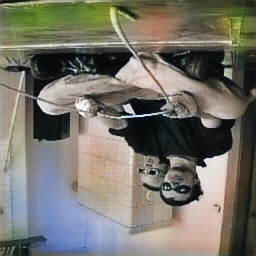

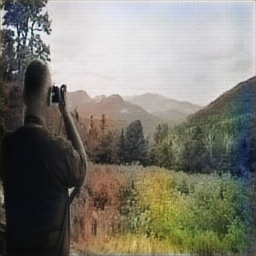

In [ ]:
# Testing the model on sample images
!python test.py --dataroot ./datasets/colorization --name colorization_pix2pix --model pix2pix --direction AtoB --num_test 20

# Display results
from IPython.display import Image, display
import glob

# Show generated colorized images
for img_path in glob.glob('results/colorization_pix2pix/test_latest/images/*_fake_B.png'):
    display(Image(filename=img_path))


In [ ]:
import os
import torch
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
import numpy as np
from PIL import Image
import subprocess

def compute_psnr(original, generated):
    mse_value = mean_squared_error(np.array(original), np.array(generated))
    if mse_value == 0:
        return 100  # Perfect match (no error)
    return 20 * np.log10(255.0 / np.sqrt(mse_value))

def compute_metrics(original_img, generated_img):
    # Resize images to a fixed size (256x256) before computing metrics
    size = (256, 256)  # Resize to 256x256 (adjust as necessary for your model)
    original_img = original_img.resize(size)
    generated_img = generated_img.resize(size)

    # Convert images to grayscale for MAE, MSE, PSNR
    original_gray = original_img.convert("L")
    generated_gray = generated_img.convert("L")

    original_np = np.array(original_gray)
    generated_np = np.array(generated_gray)

    mae = np.mean(np.abs(original_np - generated_np))
    mse = np.mean((original_np - generated_np) ** 2)
    psnr = compute_psnr(original_gray, generated_gray)
    ssim_value = ssim(original_np, generated_np)

    return mae, mse, psnr, ssim_value

def run_test_script_with_metrics(dataroot, name, model, direction, num_test=10):
    # Run the test.py script
    test_script_cmd = f'python test.py --dataroot {dataroot} --name {name} --model {model} --direction {direction} --num_test {num_test}'
    subprocess.run(test_script_cmd, shell=True)

    # Initialize variables to store metrics
    total_mae, total_mse, total_psnr, total_ssim = 0, 0, 0, 0
    num_images = 0

    # Path to the test results and dataset
    results_dir = os.path.join(dataroot, 'results', name)
    generated_images_dir = '/content/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix/results/colorization_pix2pix/test_latest/images'  # Correct path to your test images
    testA_dir = '/content/pytorch-CycleGAN-and-pix2pix/datasets/colorization/A/test'  # Correct path for testA images (input images)
    testB_dir = '/content/pytorch-CycleGAN-and-pix2pix/datasets/colorization/B/test'  # Correct path for testB images (ground truth)

    # Iterate over generated images and compute metrics
    for i, img_name in enumerate(os.listdir(generated_images_dir)):
        if i >= num_test: break

        # Extract the number from the generated image name (e.g., '0_fake_B.png' => '0')
        img_number = img_name.split('_')[0]  # '0' from '0_fake_B.png'

        input_img_name = f"{img_number}.jpg"  # Input image (testA)
        ground_truth_img_name = f"{img_number}.jpg"  # Ground truth image (testB)

        generated_img_path = os.path.join(generated_images_dir, img_name)
        testA_img_path = os.path.join(testA_dir, input_img_name)  # Input image (black and white)
        testB_img_path = os.path.join(testB_dir, ground_truth_img_name)  # Ground truth image (colored)

        # Check if both input and ground truth images exist before processing
        if not os.path.exists(testA_img_path):
            print(f"Warning: Input image not found for {input_img_name}, skipping...")
            continue
        if not os.path.exists(testB_img_path):
            print(f"Warning: Ground truth image not found for {ground_truth_img_name}, skipping...")
            continue

        # Open images
        generated_img = Image.open(generated_img_path)
        input_img = Image.open(testA_img_path)
        original_img = Image.open(testB_img_path)

        # Compute metrics
        mae, mse, psnr, ssim_value = compute_metrics(original_img, generated_img)

        # Accumulate metrics
        total_mae += mae
        total_mse += mse
        total_psnr += psnr
        total_ssim += ssim_value

        print(f"Image {i + 1}: MAE={mae:.4f}, MSE={mse:.4f}, PSNR={psnr:.4f}, SSIM={ssim_value:.4f}")

        num_images += 1

    if num_images == 0:
        print("No valid images found for metrics calculation.")
        return None

    # Calculate and print the average metrics
    avg_mae = total_mae / num_images
    avg_mse = total_mse / num_images
    avg_psnr = total_psnr / num_images
    avg_ssim = total_ssim / num_images

    print("\nAverage Metrics:")
    print(f"Average MAE: {avg_mae:.4f}")
    print(f"Average MSE: {avg_mse:.4f}")
    print(f"Average PSNR: {avg_psnr:.4f}")
    print(f"Average SSIM: {avg_ssim:.4f}")

    # Save metrics to a text file
    metrics_dir = os.path.join(results_dir, 'metrics')
    os.makedirs(metrics_dir, exist_ok=True)  # Ensure the directory exists
    metrics_file_path = os.path.join(metrics_dir, 'test_metrics.txt')

    with open(metrics_file_path, 'w') as f:
        f.write(f"Average MAE: {avg_mae:.4f}\n")
        f.write(f"Average MSE: {avg_mse:.4f}\n")
        f.write(f"Average PSNR: {avg_psnr:.4f}\n")
        f.write(f"Average SSIM: {avg_ssim:.4f}\n")

    return avg_mae, avg_mse, avg_psnr, avg_ssim

# Example usage
dataroot = './datasets/colorization'  # Update this with your dataset path
name = 'colorization_pix2pix'         # Your experiment name (as per test.py)
model = 'pix2pix'                     # Model type (pix2pix)
direction = 'AtoB'                    # Direction for conversion (A=black&white, B=color)
num_test = 10                         # Number of test images

# Run the test and metrics evaluation
average_metrics = run_test_script_with_metrics(dataroot, name, model, direction, num_test)

# Print average metrics
if average_metrics:
    print("\nFinal Average Metrics:", average_metrics)


FileNotFoundError: [Errno 2] No such file or directory: '/content/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix/results/colorization_pix2pix/test_latest/images'

#model save

In [ ]:
# Save model to Google Drive or download locally
from google.colab import drive
drive.mount('/content/drive')

!cp -r checkpoints/colorization_pix2pix /content/drive/MyDrive/colorization_pix2pix_model/  # Adjust path if necessary


Mounted at /content/drive
